In [1]:
from skimage import measure, data, filters
from skimage.color import rgb2gray
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


Number of labels:  12


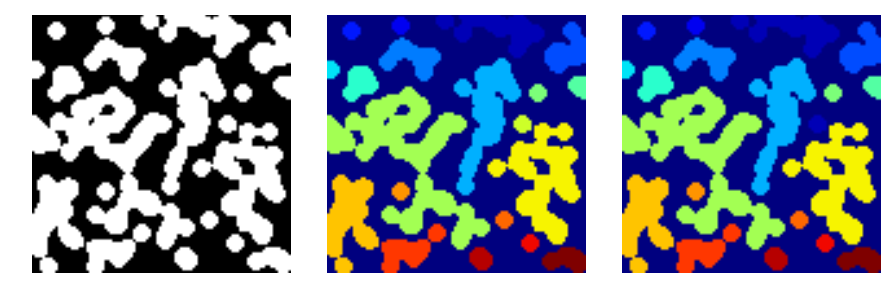

In [2]:

# generate blobs
n = 12
l = 100
np.random.seed(7)
im = np.zeros((l, l))
points = l * np.random.random((2, n ** 2))
im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
im = filters.gaussian(im, sigma= l / (4. * n))
blobs = im > 0.7 * im.mean()

# labelling
all_labels, num = measure.label(blobs, return_num=True)
blobs_labels = measure.label(blobs, background=0)
label_mask = (all_labels == 12).astype(np.int)
mask_image = all_labels - label_mask * 11

# display
print "Number of labels: ", n
plt.figure(figsize=(9, 3.5))
plt.subplot(131)
plt.imshow(blobs, cmap='gray')
plt.axis('off')
plt.subplot(132)
plt.imshow(all_labels * 256 / n)
plt.axis('off')
plt.subplot(133)
plt.imshow(mask_image)
plt.axis('off')

plt.tight_layout()
plt.show()

Number of labels:  344


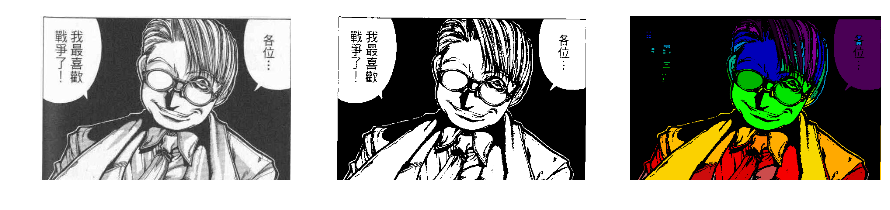

In [3]:
# image = data.camera()
image = imread('./test.jpg', as_grey=True)

# apply threshold
thresh = filters.threshold_otsu(image)
bw = image > thresh

# labelling
all_bw_labels, n = measure.label(bw, return_num=True)
blobs_bw_labels = measure.label(bw, background=0)

# display
print "Number of labels: ", n
plt.figure(figsize=(9, 3.5))
plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(132)
plt.imshow(bw, cmap='gray')
plt.axis('off')
plt.subplot(133)
plt.imshow(all_bw_labels, cmap='spectral')
plt.axis('off')

plt.tight_layout()
plt.show()